In [0]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
%matplotlib inline
import imageio
import warnings, matplotlib 
warnings.filterwarnings("ignore")  # matplotlib warnings
import os


#Exercise 1


Simulate a random walk of an agent on a square lattice. The program
should take a snapshot of the lattice in every time step and save it to a
jpg or png file. These files should then be used to generate a movie (avi
or animated gif).


I define square lattice and implement 2d lattice graph generator.
I start in random point and take random steps.


In [0]:
N = 10
G = nx.grid_2d_graph(N,N)

def plot_lattice_graph(g, current_node, filepath):
    plt.figure()
    
    vertices = list(g.nodes())
    x = [el[0] for el in vertices]
    y = [el[1] for el in vertices]
    plt.scatter(x, y, color = 'b')
    plt.xlim([min(x), max(x)])
    plt.ylim([min(y), max(y)])

    for u in g.nodes():
        for v in g.neighbors(u):
            x = [el[0] for el in [u,v]]
            y = [el[1] for el in [u,v]]
            plt.plot(x, y, 'b')
            
    if current_node:
        x_current = [current_node[0]]
        y_current = [current_node[1]]
        plt.scatter(x_current, y_current, s = 150, c = 'r')
        
    plt.axis('off')
        
    if filepath:
        plt.savefig(filepath)

In [0]:
def simulate_random_walk(g, steps):
    current_node = random.choice(list(g.nodes()))

    for i in range(steps):
        current_node = random.choices(list(g.neighbors(current_node)))[0]
        plot_lattice_graph(g, current_node, filepath=f'img{i}.png')

There is a output of the simulation for 20 steps.

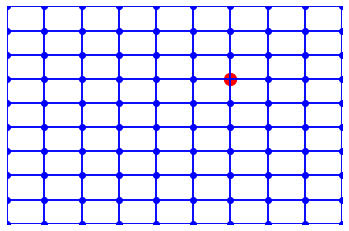

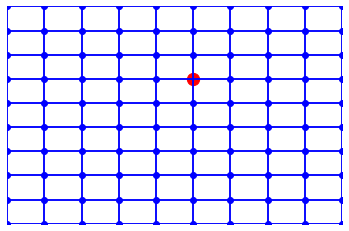

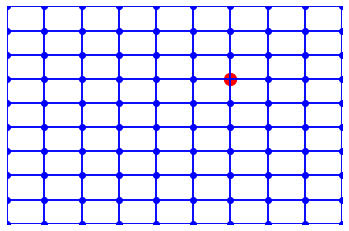

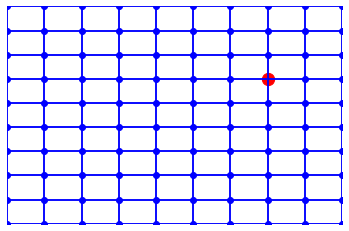

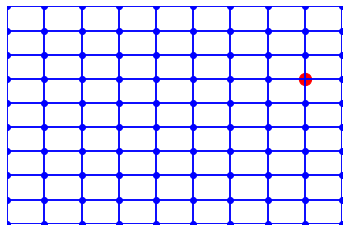

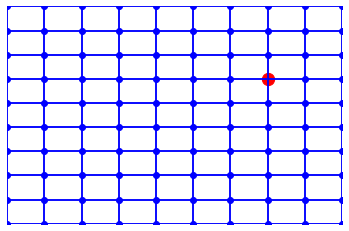

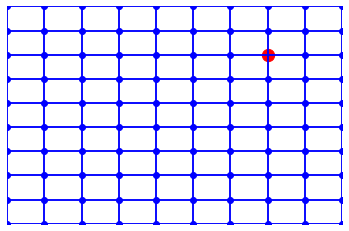

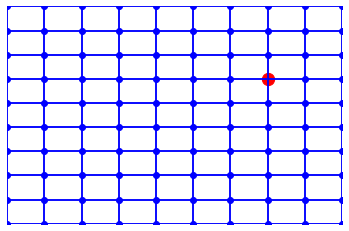

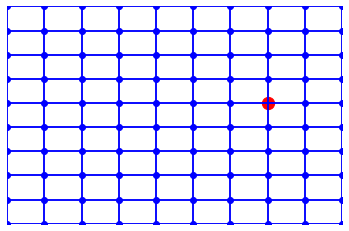

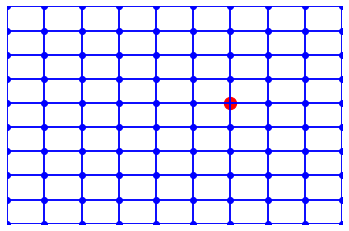

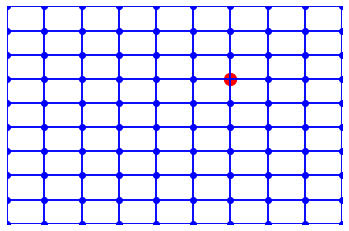

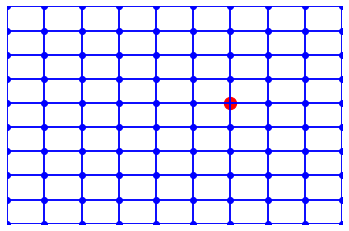

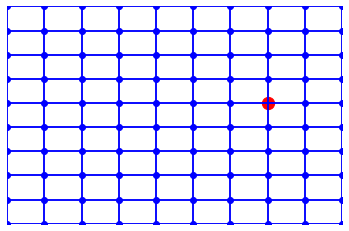

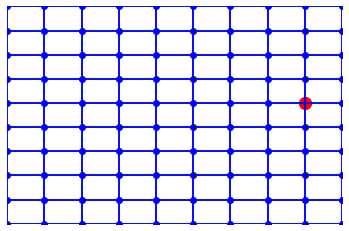

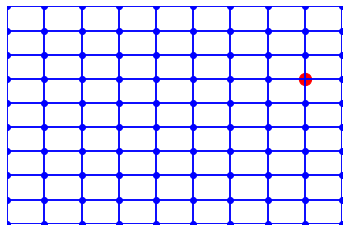

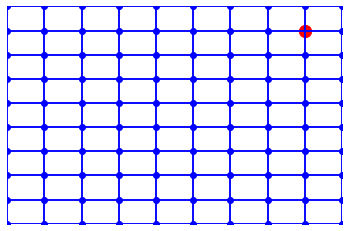

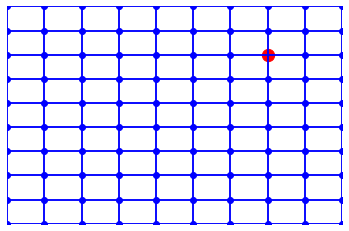

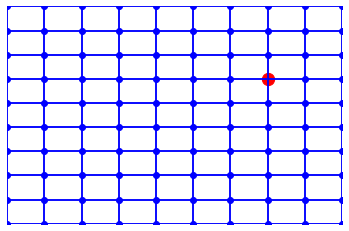

In [4]:
number_of_steps = 20
simulate_random_walk(G, number_of_steps)

I make a gif from png files.
To download this gif please use Google Colab, the download will starting automatically.

In [0]:
filenames = []

for i in range(number_of_steps):
  filename = f'img{i}.png'
  filenames.append(filename)

In [0]:
import imageio
with imageio.get_writer('animation.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


In [0]:
from google.colab import files

files.download('animation.gif')

# Exercise 2


Write a computer program to simulate Pearson’s random walk in the plane,
where the steps have constant length a = 1 and uniformly distributed
random angles. By simulating many long walks of N steps (e.g. N = 1000)
starting from the origin, compute and plot normalized histograms (i.e. the
PDFs) of AN , the fraction of time steps when the walker is in right half
plane (x > 0) and of BN , the fraction of time the walker is in the first
quadrant (x > 0, y > 0). The expected values are clearly A_n =1/2
 and B_N=1/4, but what are the most probable values? Plot several
trajectories to illustrate your results.

The main aim of task number 2 was to simulate Pearson's random walk and make some reasoning about distribution of time spent in specific places on plane.
Definition of the Pearson's random walk which can be found there:

In [0]:
def generate(N):
  alpha=2*np.pi*np.random.rand(N)
  x=np.cumsum(np.sin(alpha))
  y=np.cumsum(np.cos(alpha))
  return x,y

And the simulations:

In [9]:
N_STEPS = 1000
N = 1000
results = []

for _ in range(N_STEPS):
    x,y = generate(N)
    value = (x>0).sum()/N
    results.append(value)

plt.hist(results)
plt.show()
print(f'Mean: {np.mean(results)}')

Mean: 0.48579


In [10]:
N_STEPS = 1000
N = 1000
results = []

for _ in range(N_STEPS):
    x,y = generate(N)
    value = np.logical_and(x>0, y>0).sum()/N
    results.append(value)
    
plt.hist(results)
plt.show()  

print(f'Mean: {np.mean(results)}')

Mean: 0.25819


The normalized histograms and value of mean confirm that probabilities are equal to expectations.

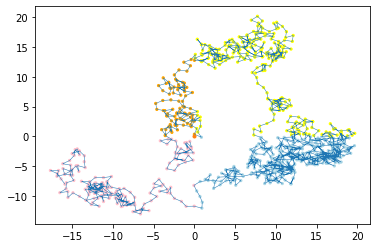

In [11]:
generate(N)
plt.scatter(x,y,s=5,c=np.array(['pink','lightblue','orange','yellow'])[(x>0)*1+(y>0)*2])
plt.plot(x,y,linewidth=0.5)
plt.plot(0,0,'.')

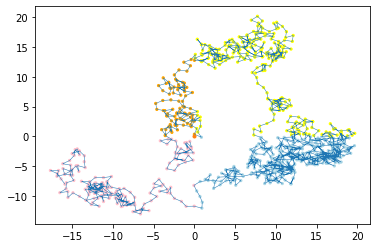

In [12]:
generate(N)
plt.scatter(x,y,s=5,c=np.array(['pink','lightblue','orange','yellow'])[(x>0)*1+(y>0)*2])
plt.plot(x,y,linewidth=0.5)
plt.plot(0,0,'.')

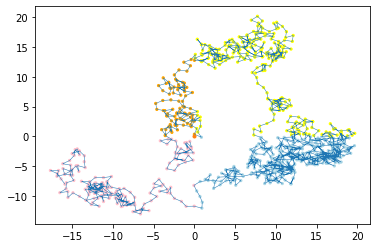

In [13]:
generate(N)
plt.scatter(x,y,s=5,c=np.array(['pink','lightblue','orange','yellow'])[(x>0)*1+(y>0)*2])
plt.plot(x,y,linewidth=0.5)
plt.plot(0,0,'.')

Several trajectories to illustrate my results.

# Exercise 3


Write a program that. . .

• will illustrate a random walk on a given graph (avi or animated gif),

• for a given origin node will estimate average hitting times of all other
nodes.
Compare the results for graphs of different topologies. Set N = 20 for
visualization purposes and N = 100 otherwise.

The main aim of this task was to estimate average hit time from specific starting node to all other nodes.
Firstly I implement simulation of random walking on graph.
I do this simulations for diffrent topologies (Complete graph, Barabasi Albert model and circulant graph).


In [0]:
def random_walk_on_graph(g, max_steps=10):
    current_node = random.choice(list(g.nodes()))
    target_node = current_node
    pos=nx.spring_layout(g)
    for i in range(max_steps):
      current_node = random.choices(list(g.neighbors(current_node)))[0]
      plt.show()
      nx.draw_networkx(g, pos = pos)
      nx.draw_networkx_nodes(g, pos = pos, nodelist = [current_node], node_color = 'red')
      plt.axis('off')
      plt.savefig(f'img{i}.png')


##Complete graph

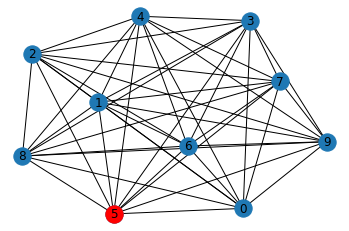

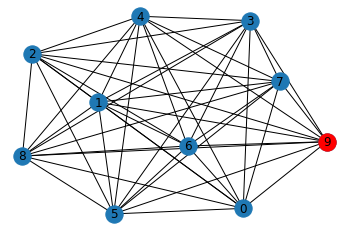

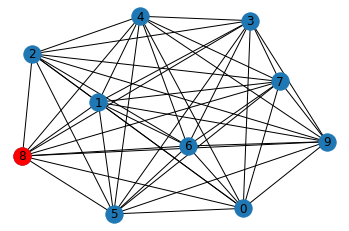

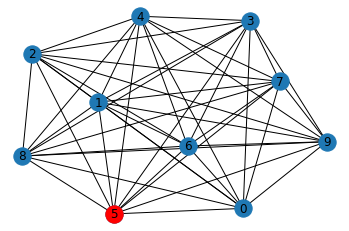

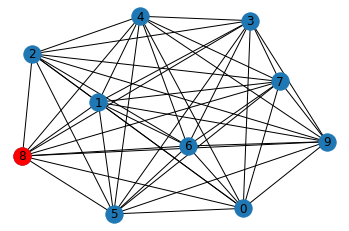

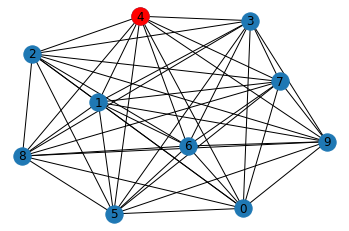

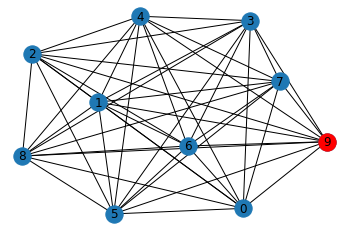

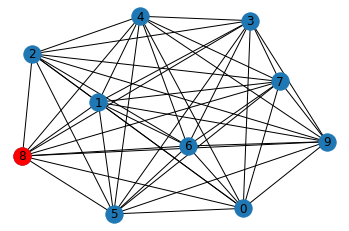

In [15]:
number_steps = 10
complete = nx.complete_graph(10)
random_walk_on_graph(complete,10)

In [0]:
filenames = []

for i in range(number_steps):
  filename = f'img{i}.png'
  filenames.append(filename)

In [0]:
import imageio
with imageio.get_writer('animation.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [0]:
from google.colab import files

files.download('animation.gif')

##Barabasi-Albert model

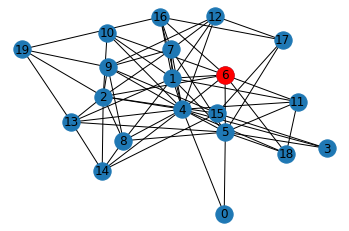

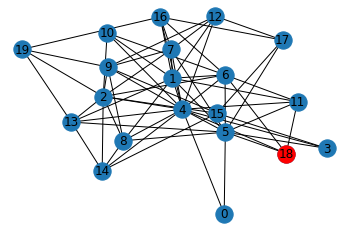

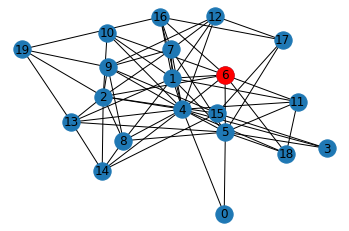

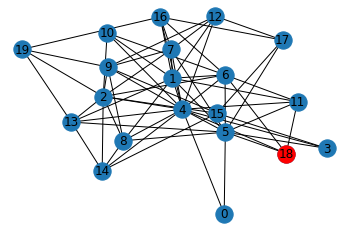

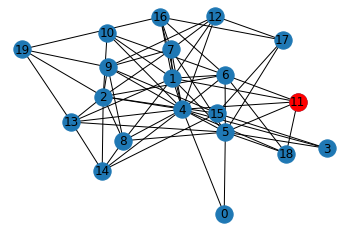

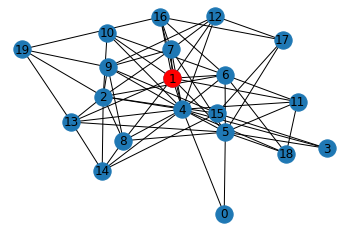

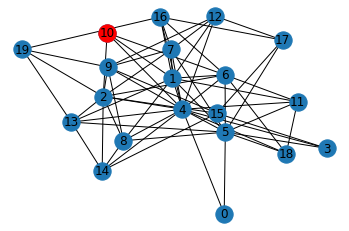

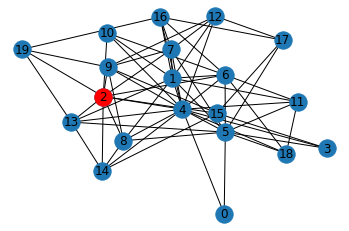

In [19]:
number_steps = 10
ba = nx.barabasi_albert_graph(20,4)
random_walk_on_graph(ba,10)

In [0]:
filenames = []

for i in range(number_steps):
  filename = f'img{i}.png'
  filenames.append(filename)

In [0]:
import imageio
with imageio.get_writer('animation.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [0]:
from google.colab import files

files.download('animation.gif')

## Circulant graph

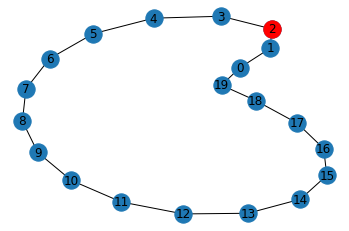

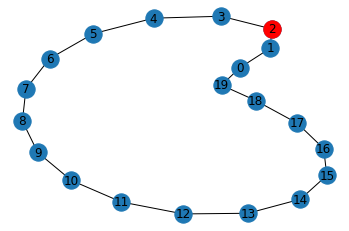

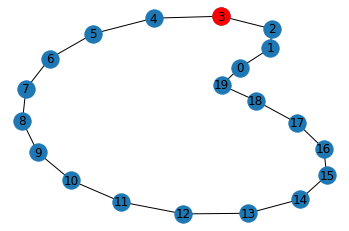

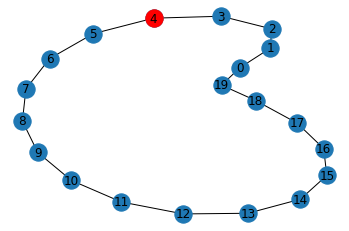

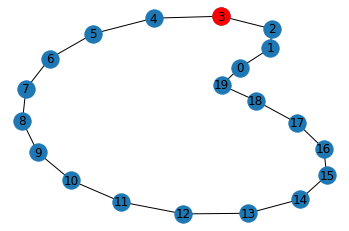

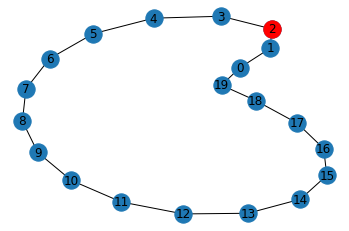

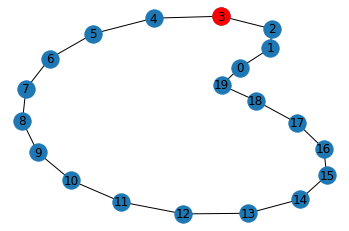

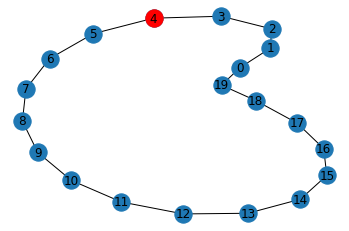

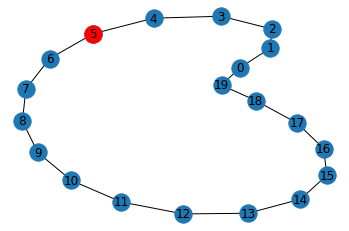

In [23]:
number_steps = 10
circ=nx.circulant_graph(20,[1])
random_walk_on_graph(circ,10)

In [0]:
filenames = []

for i in range(number_steps):
  filename = f'img{i}.png'
  filenames.append(filename)

In [0]:
import imageio
with imageio.get_writer('animation.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [0]:
from google.colab import files

files.download('animation.gif')

## Average hitting times of all other

Using Monte-Carlo Simulation I compte average hitting time for previous graphs.

In [0]:
def hitting_time(G, origin, N=100):
    times={}
    now=origin
    for steps in range(1,N+1):
        now=random.choice(list(G[now].keys()))
        if now!=origin and now not in times:
            times[now]=steps
    return times

In [0]:
def aggregate(dicts):
    results={}
    for d in dicts:
        for k, v in d.items():
            if k in results:
                results[k].append(v)
            else:
                results[k]=[v]
    return results

In [0]:
def average_times(G, origin, N=100, M=1000):
    times=aggregate([hitting_time(G,origin) for _ in range(M)])
    avgtimes={k: np.mean(v) for k, v in times.items()}
    avgtimes[origin]=0.0
    for node in G.nodes():
        if node not in avgtimes:
            avgtimes[node]=np.inf
    return [avgtimes[node] for node in G.nodes()]

## Barabasi Albert 

In [30]:
average_times(ba,0)

[0.0,
 14.014,
 14.905,
 32.36907449209932,
 4.727,
 6.884,
 17.464859437751002,
 19.196374622356494,
 21.40752032520325,
 20.443548387096776,
 29.524159663865547,
 24.67317574511819,
 26.029866117404737,
 21.84732052578362,
 26.316168898043255,
 27.29405630865485,
 23.179331306990882,
 30.360759493670887,
 27.72872340425532,
 31.495278069254983]

## Complete graph

In [31]:
average_times(complete,0)

[0.0, 9.335, 8.722, 8.99, 9.645, 9.009, 9.161, 9.03, 9.279, 8.964]

# Circulant graph

In [32]:
average_times(circ,0)

[0.0,
 9.185344827586206,
 17.806157354618016,
 24.233939393939394,
 31.114503816793892,
 36.4054054054054,
 41.94871794871795,
 46.13731343283582,
 49.57639939485628,
 50.73913043478261,
 51.92649310872894,
 50.67032967032967,
 48.72121212121212,
 45.145833333333336,
 40.566523605150216,
 35.71487039563438,
 31.195928753180663,
 25.47779111644658,
 17.89177001127396,
 9.380446333687566]